# **El conjunto de datos Fashion-MNIST**
 El conjunto de datos Fashion-MNIST contiene imágenes de artículos de Zalando, con imágenes en escala de grises de 28x28 de 70.000 productos de moda de 10 categorías, y 7.000 imágenes por categoría. El conjunto de entrenamiento tiene 60.000 imágenes y el de prueba, 10.000.
Fashion-MNIST es similar al conjunto de datos MNIST que quizás ya conozcas, el cual se utiliza para clasificar dígitos escritos a mano. Esto significa que las dimensiones de la imagen y las divisiones de entrenamiento y prueba son similares a las del conjunto de datos MNIST.

In [1]:
!pip install tensorflow

In [2]:

from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Analicemos ahora cómo se ven las imágenes en el conjunto de datos.

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Forma de los datos de entrenamiento : ', train_X.shape, train_Y.shape)

print('Forma de los datos de prueba : ', test_X.shape, test_Y.shape)

Forma de los datos de entrenamiento :  (60000, 28, 28) (60000,)
Forma de los datos de prueba :  (10000, 28, 28) (10000,)


Del resultado anterior, se puede observar que los datos de entrenamiento tienen una forma de 60 000 x 28 x 28, ya que hay 60 000 muestras de entrenamiento, cada una con una dimensión de 28 x 28. De forma similar, los datos de prueba tienen una forma de 10 000 x 28 x 28, ya que hay 10 000 muestras de prueba.

También hay un total de diez clases de salida que van del 0 al 9.

In [4]:
# Encuentra los números únicos en las etiquetas de los trenes.
classes = np.unique(train_Y)
nClasses = len(classes)
print('Número total de salidas : ', nClasses)
print('Clases de salida : ', classes)

Número total de salidas :  10
Clases de salida :  [0 1 2 3 4 5 6 7 8 9]


Se puede ver algunas imágenes en el conjunto de datos:

Text(0.5, 1.0, 'Ground Truth : 9')

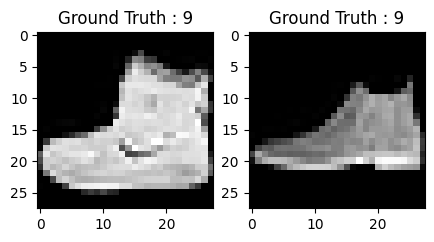

In [5]:
plt.figure(figsize=[5,5])

# Mostrar la primera imagen en los datos de entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Mostrar la primera imagen en los datos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


También la función de ayuda show_images() muestra un total de 12 imágenes por defecto y toma tres parámetros principales: las imágenes de entrenamiento, los nombres de las clases y las etiquetas de entrenamiento.

In [6]:
def show_images(train_images,
                class_names,
                train_labels,
                nb_samples = 12, nb_row = 4):

    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

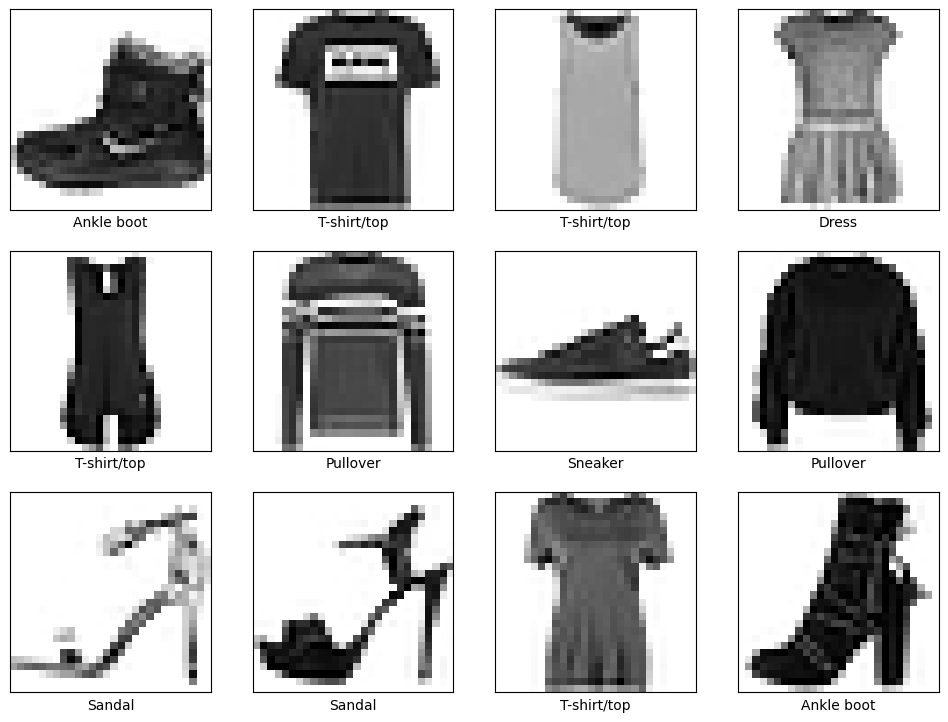

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

show_images(train_X, class_names, train_Y)

# Preparar los datos


Preprocesar las imágenes normalizándolas y redimensionándolas para que sean compatibles con la entrada de la CNN. Convertir las etiquetas a formato one-hot encoding.


In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Forma de los datos de entrenamiento después del preprocesamiento: ', train_X.shape, train_Y_one_hot.shape)
print('Forma de los datos de prueba después del preprocesamiento: ', test_X.shape, test_Y_one_hot.shape)

Forma de los datos de entrenamiento después del preprocesamiento:  (60000, 28, 28, 1) (60000, 10)
Forma de los datos de prueba después del preprocesamiento:  (10000, 28, 28, 1) (10000, 10)


## Construir el modelo cnn

Definir la arquitectura de la red neuronal convolucional utilizando capas convolucionales, de pooling y densas.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compilar el modelo

Configurar el modelo para el entrenamiento, especificando la función de pérdida, el optimizador y las métricas de evaluación.


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrenar el modelo

Entrenar la red neuronal utilizando los datos de entrenamiento y validarla con los datos de prueba.


In [11]:
batch_size = 64
epochs = 10

history = model.fit(train_X, train_Y_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_X, test_Y_one_hot))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6873 - loss: 0.8516 - val_accuracy: 0.8348 - val_loss: 0.4570
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8491 - loss: 0.4185 - val_accuracy: 0.8581 - val_loss: 0.3899
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8671 - loss: 0.3581 - val_accuracy: 0.8586 - val_loss: 0.3783
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8806 - loss: 0.3182 - val_accuracy: 0.8761 - val_loss: 0.3437
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8943 - loss: 0.2854 - val_accuracy: 0.8801 - val_loss: 0.3340
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9018 - loss: 0.2609 - val_accuracy: 0.8826 - val_loss: 0.3190
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9128 - loss: 0.2376 - val_accuracy: 0.8854 - val_loss: 0.3262
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9181 - loss: 0.2195 - val_accuracy: 0

# **Curva de Entrenamiento**
Para graficar las curvas de precisión y pérdida durante el entrenamiento y la validación, lo cuál nos ayudará a visualizar cómo se comportó el modelo a lo largo de las épocas.

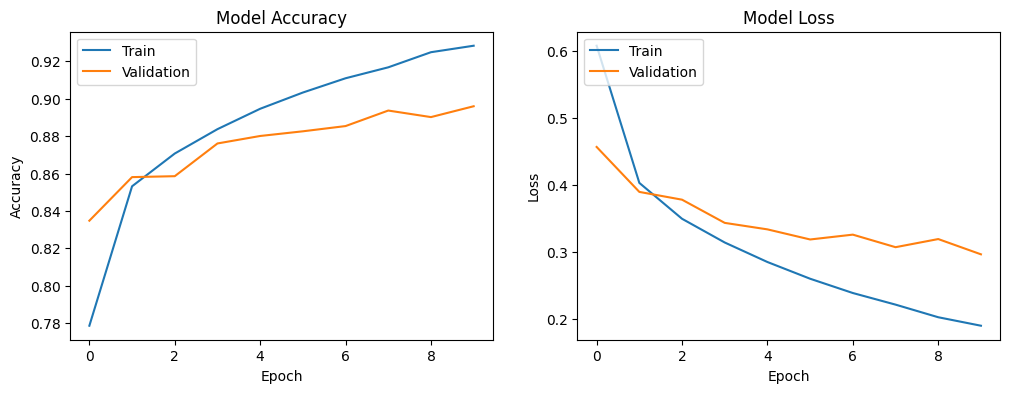

In [12]:
# Trazar los valores de precisión de entrenamiento y validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Trazar los valores de pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluar el modelo

Evaluar el rendimiento del modelo entrenado en los datos de prueba.

In [13]:
score = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29680895805358887
Test accuracy: 0.8960000276565552



Test loss (Pérdida en la prueba): Este valor representa qué tan bien se desempeñó el modelo en los datos de prueba en términos de la función de pérdida utilizada durante el entrenamiento (en este caso, 'categorical_crossentropy'). Una pérdida menor indica un mejor rendimiento. Un valor de 0.2583 por ejemplo es relativamente bajo, lo que sugiere que el modelo está haciendo un buen trabajo minimizando el error en las predicciones en el conjunto de prueba.

Test accuracy (Precisión en la prueba): Este valor indica el porcentaje de imágenes en el conjunto de prueba que el modelo clasificó correctamente. Un valor por ejemplo de 0.9133 (o 91.33%) significa que el modelo predijo correctamente la categoría de moda para aproximadamente el 91.33% de las imágenes en el conjunto de datos de prueba.

## Métricas de evaluación adicionales

Generar una matriz de confusión y un reporte de clasificación para obtener una evaluación más detallada del rendimiento del modelo.
Esto se puede lograr a partir de la matriz de confusión, que muestra para cada clase el número de predicciones correctas e incorrectas. Comenzamos haciendo predicciones sobre los datos de prueba, luego calculamos la matriz de confusión y mostramos el resultado final.

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Obtener las predicciones del modelo en el conjunto de prueba
test_predictions = model.predict(test_X)

# Convertir las predicciones de probabilidades a etiquetas de clase
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Convertir las etiquetas one-hot reales a etiquetas de clase
test_true_classes = np.argmax(test_Y_one_hot, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(test_true_classes, test_predictions_classes)
print("Matriz de Confusión:")
print(conf_matrix)

# Generar el reporte de clasificación
class_report = classification_report(test_true_classes, test_predictions_classes)
print("\nReporte de Clasificación:")
print(class_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión:
[[848   1  29  21   5   2  86   0   8   0]
 [  4 974   0  18   2   0   1   0   1   0]
 [ 12   0 862   8  42   0  75   0   1   0]
 [ 15   4  19 919  17   0  23   0   1   2]
 [  2   1  48  32 785   0 132   0   0   0]
 [  0   0   0   4   0 958   0  21   2  15]
 [110   1  80  39  41   0 719   0  10   0]
 [  0   0   0   0   0   8   0 971   0  21]
 [  6   1   3   4   0   2   9   2 972   1]
 [  1   0   1   1   0   4   0  40   1 952]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.86      0.84      1000
           3       0.88      0.92      0.90      1000
           4       0.88      0.79      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.69      0.72      0.70      1000
           7       0.94      0.97      0.95    

**Mostrando lo anterior con un mayor detalle visual**



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


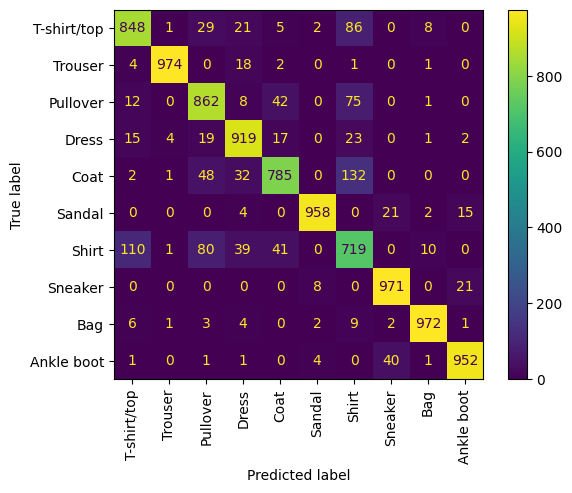

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones del modelo en el conjunto de prueba
test_predictions = model.predict(test_X)

# Convertir las predicciones de probabilidades a etiquetas de clase
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convertir las etiquetas reales a etiquetas de clase (using test_Y)
test_true_labels = test_Y

# Generar la matriz de confusión
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Mostrar la matriz de confusión
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='vertical')
plt.show()

Esta parte del código define tres arquitecturas de redes neuronales convolucionales (CNN) para clasificación de imágenes: (1) el Modelo Original (básico con 3 capas convolucionales y Flatten), (2) el Modelo Profundo (6 capas con BatchNormalization y Dropout para regularización, corrigiendo dimensiones con padding estratégico), y (3) el Modelo GlobalAvg (alternativa eficiente que reemplaza Flatten con GlobalAveragePooling2D para reducir parámetros y evitar overfitting). Cada variante muestra compensaciones entre complejidad, precisión y eficiencia: el Original es simple pero limitado, el Profundo ofrece mayor capacidad de aprendizaje a costa de recursos, y GlobalAvg equilibra rendimiento y eficiencia mediante la condensación espacial de características, siendo ideal para implementaciones prácticas donde el balance precisión-velocidad es crítico.

In [16]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Modelo Original
def create_original_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(nClasses, activation='softmax')
    ])
    return model

# Modelo Profundo CORREGIDO
def create_deeper_model():
    model = Sequential([
        # Bloque 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Bloque 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Bloque 3 - Usamos kernel más pequeño aquí
        Conv2D(128, (2, 2), activation='relu', padding='valid'),  # Sin padding para reducir dimensiones
        BatchNormalization(),
        Conv2D(128, (2, 2), activation='relu', padding='valid'),
        # No usamos MaxPooling aquí para evitar reducir demasiado
        Dropout(0.25),

        # Capa final
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(nClasses, activation='softmax')
    ])
    return model

# Modelo Alternativo con Global Average Pooling
def create_global_avg_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='valid'),
        BatchNormalization(),
        GlobalAveragePooling2D(),  # Evita problemas de dimensiones
        Dropout(0.3),

        Dense(nClasses, activation='softmax')
    ])
    return model

Evalúa cómo afecta el número de épocas de entrenamiento al rendimiento de diferentes arquitecturas de modelos, proporcionando métricas comparativas y visualizaciones.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

=== COMPARACIÓN COMPLETA ===

=== Modelo: Original ===

Entrenando con 10 épocas...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8103 - loss: 0.6844 - precision: 0.9355 - recall: 0.6695 - val_accuracy: 0.9439 - val_loss: 0.2095 - val_precision: 0.9599 - val_recall: 0.9279
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9446 - loss: 0.1966 - precision: 0.9596 - recall: 0.9331 - val_accuracy: 0.9597 - val_loss: 0.1486 - val_precision: 0.9685 - val_recall: 0.9507
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.1390 - precision: 0.9706 - recall: 0.9538 - val_accuracy: 0.9662 - val_loss: 0.1195 - val_precision: 0.9728 - val_recall: 0.9601
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9711 - loss: 0.1020 - precision: 0.9780 - recall: 0.9660 - val_accuracy: 0.9695 - val_loss: 0.1049 - val_precision: 0.9749 - val_recall: 0.9644
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0791 - precision: 0.9823 - recall: 0.9733 - val_accuracy: 0.9729 - val_loss: 0.

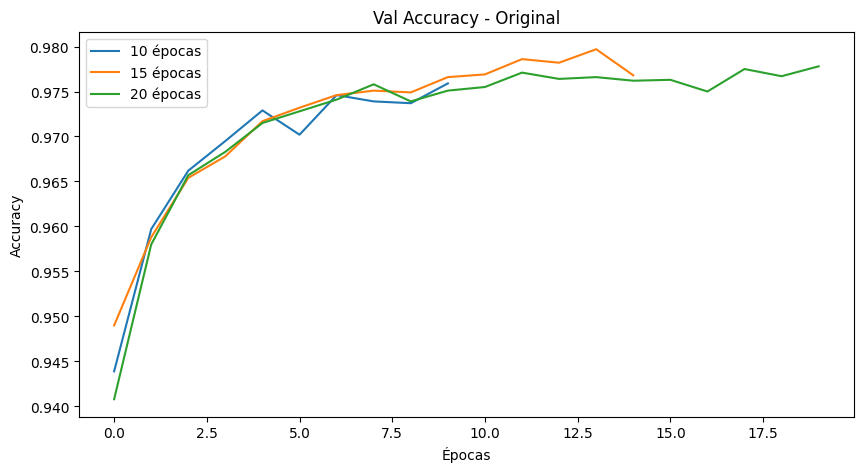


=== Modelo: Profundo ===

Entrenando con 10 épocas...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7909 - loss: 0.6598 - precision_3: 0.9035 - recall_3: 0.6898 - val_accuracy: 0.9805 - val_loss: 0.0657 - val_precision_3: 0.9834 - val_recall_3: 0.9784
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9689 - loss: 0.1032 - precision_3: 0.9739 - recall_3: 0.9645 - val_accuracy: 0.9852 - val_loss: 0.0497 - val_precision_3: 0.9876 - val_recall_3: 0.9835
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9777 - loss: 0.0754 - precision_3: 0.9817 - recall_3: 0.9743 - val_accuracy: 0.9878 - val_loss: 0.0428 - val_precision_3: 0.9889 - val_recall_3: 0.9865
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9834 - loss: 0.0558 - precision_3: 0.9861 - recall_3: 0.9815 - val_accuracy: 0.9894 - val_loss: 0.0369 - val_precision_3: 0.9911 - val_recall_3: 0.9884
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0487 - precision_3: 0.9870 - recall_3: 0.9841 

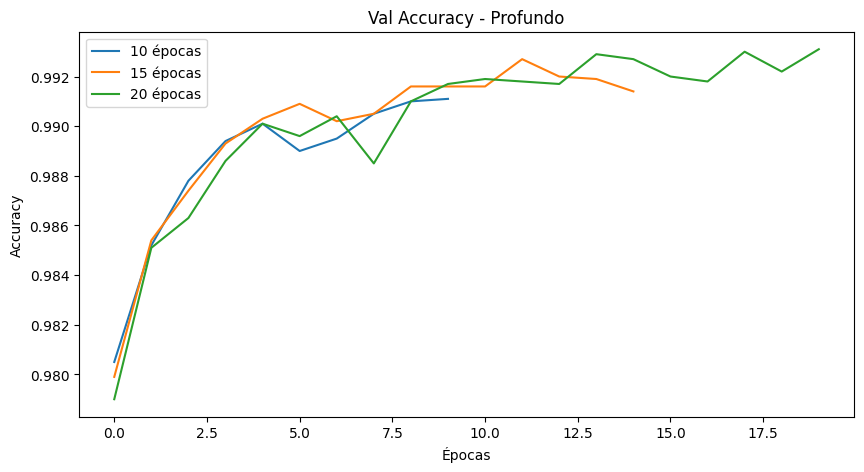


=== Modelo: GlobalAvg ===

Entrenando con 10 épocas...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2124 - loss: 2.0996 - precision_6: 0.6085 - recall_6: 0.0218 - val_accuracy: 0.4490 - val_loss: 1.5988 - val_precision_6: 0.8988 - val_recall_6: 0.0977
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4364 - loss: 1.5733 - precision_6: 0.8428 - recall_6: 0.1203 - val_accuracy: 0.5076 - val_loss: 1.4289 - val_precision_6: 0.7606 - val_recall_6: 0.1509
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5374 - loss: 1.3938 - precision_6: 0.8413 - recall_6: 0.1623 - val_accuracy: 0.6154 - val_loss: 1.2203 - val_precision_6: 0.8080 - val_recall_6: 0.2344
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6211 - loss: 1.2065 - precision_6: 0.8491 - recall_6: 0.2723 - val_accuracy: 0.6730 - val_loss: 1.0582 - val_precision_6: 0.8559 - val_recall_6: 0.3642
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6772 

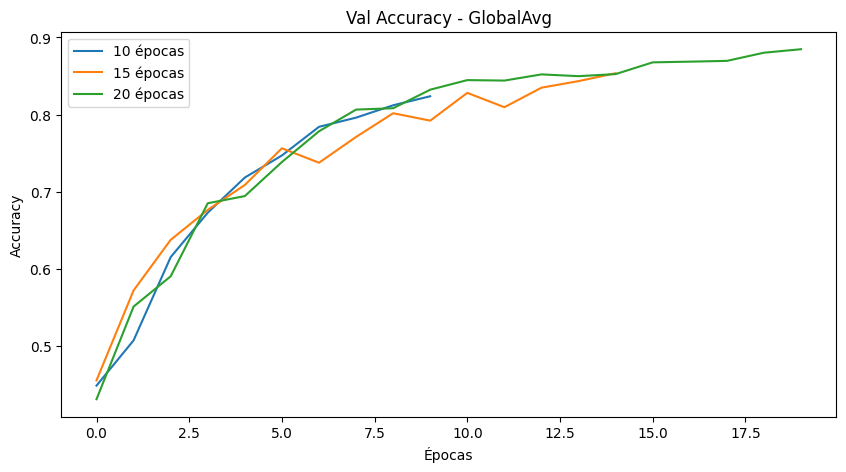


=== Resultados Consolidados ===
Modelo		Épocas	Accuracy	Loss		Precision	Recall
Original  	10	0.9771		0.0758		0.9793		0.9752
Original  	15	0.9788		0.0719		0.9809		0.9773
Original  	20	0.9778		0.0782		0.9792		0.9768
Profundo  	10	0.9916		0.0264		0.9922		0.9911
Profundo  	15	0.9926		0.0263		0.9927		0.9920
Profundo  	20	0.9933		0.0242		0.9934		0.9932
GlobalAvg 	10	0.8216		0.6138		0.8960		0.7160
GlobalAvg 	15	0.8538		0.5019		0.9077		0.7851
GlobalAvg 	20	0.8863		0.3966		0.9250		0.8411


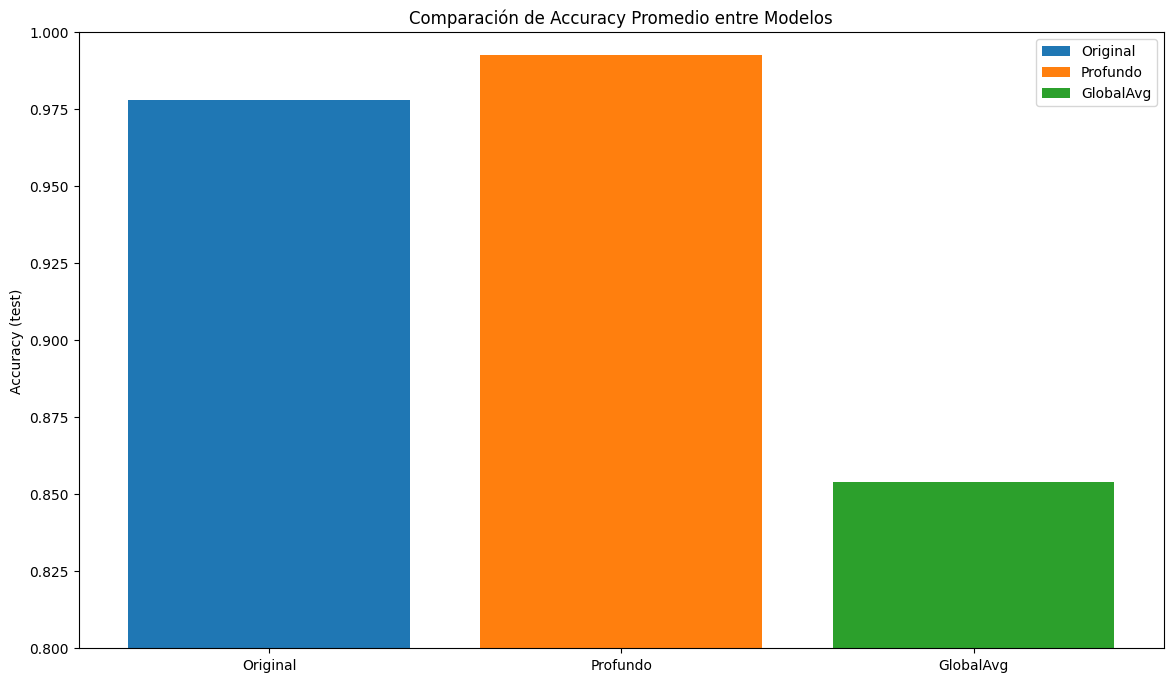

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.metrics import Precision, Recall

# 1. Carga y preprocesamiento de datos
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
# Reshape para canales (conviene para modelos Conv2D)
train_X = train_X.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_X = test_X.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# One-hot encoding para las etiquetas
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# División de validación (últimos 10000 de train)
val_X = train_X[-10000:]
val_Y_one_hot = train_Y_one_hot[-10000:]
train_X = train_X[:-10000]
train_Y_one_hot = train_Y_one_hot[:-10000]

# 2. Definición de modelos
def create_original_model():
    model = Sequential([
        Flatten(input_shape=(28,28,1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def create_deeper_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

def create_global_avg_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        Conv2D(64, (3, 3), activation='relu'),
        GlobalAveragePooling2D(),
        Dense(10, activation='softmax')
    ])
    return model

# 3. Función de comparación de modelos y épocas
def compare_training_epochs(models_dict,
                           train_X, train_Y_one_hot,
                           val_X, val_Y_one_hot,
                           test_X, test_Y_one_hot,
                           epochs_list=[10, 15, 20]):
    results = {}
    for model_name, model_creator in models_dict.items():
        model_results = {}
        print(f"\n=== Modelo: {model_name} ===")
        for epochs in epochs_list:
            print(f"\nEntrenando con {epochs} épocas...")
            model = model_creator()
            model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy', Precision(), Recall()])
            history = model.fit(train_X, train_Y_one_hot,
                                batch_size=128,
                                epochs=epochs,
                                validation_data=(val_X, val_Y_one_hot),
                                verbose=1)
            test_results = model.evaluate(test_X, test_Y_one_hot, verbose=0)
            model_results[epochs] = {
                'test_accuracy': test_results[1],
                'test_loss': test_results[0],
                'test_precision': test_results[2],
                'test_recall': test_results[3],
                'history': history
            }
        results[model_name] = model_results

        # Gráfico por modelo
        plt.figure(figsize=(10, 5))
        for epochs, res in model_results.items():
            plt.plot(res['history'].history['val_accuracy'],
                     label=f'{epochs} épocas')
        plt.title(f'Val Accuracy - {model_name}')
        plt.xlabel('Épocas')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
    # Resultados consolidados
    print("\n=== Resultados Consolidados ===")
    print("Modelo\t\tÉpocas\tAccuracy\tLoss\t\tPrecision\tRecall")
    for model_name, model_res in results.items():
        for epochs, res in model_res.items():
            print(f"{model_name[:10]:10}\t{epochs}\t{res['test_accuracy']:.4f}\t\t"
                  f"{res['test_loss']:.4f}\t\t{res['test_precision']:.4f}\t\t"
                  f"{res['test_recall']:.4f}")
    return results

# 4. Definición del diccionario de modelos
models_to_compare = {
    'Original': create_original_model,
    'Profundo': create_deeper_model,
    'GlobalAvg': create_global_avg_model
}

# 5. Ejecución de la comparación
print("\n=== COMPARACIÓN COMPLETA ===")
full_results = compare_training_epochs(
    models_to_compare,
    train_X, train_Y_one_hot,
    val_X, val_Y_one_hot,
    test_X, test_Y_one_hot
)

# 6. Visualización comparativa adicional
plt.figure(figsize=(14, 8))
for model_name, model_res in full_results.items():
    avg_acc = np.mean([res['test_accuracy'] for res in model_res.values()])
    plt.bar(model_name, avg_acc, label=model_name)
plt.title('Comparación de Accuracy Promedio entre Modelos')
plt.ylabel('Accuracy (test)')
plt.ylim(0.8, 1.0)
plt.legend()
plt.show()